In [2]:
import os
import sys

# Get the current working directory
current_dir = os.getcwd()

# Assume the 'src' folder is one level up from the current notebook's directory
# This might need adjustment based on your exact directory structure
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Add the project root to the Python path if it's not already there
if project_root not in sys.path:
    sys.path.append(project_root)
    print(f"Added '{project_root}' to sys.path.")# =============================================================================
# 03_model_training_evaluation.ipynb
# =============================================================================

import pandas as pd
import numpy as np
import pickle # To save/load models

from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier # Using LightGBM as the ensemble model

from src.model_utils import evaluate_model # Import the evaluation function

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("Libraries and custom modules loaded successfully!")

Added 'd:\10academy\week_8_9_Improved_detection_of_ fraud_cases_for_e_commerce_and_bank_transactions' to sys.path.
Libraries and custom modules loaded successfully!


In [3]:
# --- Load Preprocessed Data ---
print("\n--- Loading Preprocessed Data ---")
try:
    with open('../data/processed_ecommerce_data.pkl', 'rb') as f:
        ecommerce_data = pickle.load(f)
    X_train_eco_resampled = ecommerce_data['X_train_resampled']
    y_train_eco_resampled = ecommerce_data['y_train_resampled']
    X_test_eco = ecommerce_data['X_test']
    y_test_eco = ecommerce_data['y_test']
    ecommerce_feature_names = ecommerce_data['feature_names'] # Store feature names for consistency

    with open('../data/processed_bank_data.pkl', 'rb') as f:
        bank_data = pickle.load(f)
    X_train_bank_resampled = bank_data['X_train_resampled']
    y_train_bank_resampled = bank_data['y_train_resampled']
    X_test_bank = bank_data['X_test']
    y_test_bank = bank_data['y_test']
    bank_feature_names = bank_data['feature_names'] # Store feature names

    print("Preprocessed E-commerce and Bank data loaded successfully.")

except FileNotFoundError:
    print("Error: Processed data not found. Please ensure Task 1 notebooks were run and data saved correctly.")
    raise # Re-raise to stop execution if data is missing


--- Loading Preprocessed Data ---
Preprocessed E-commerce and Bank data loaded successfully.



--- Training and Evaluating Models for E-commerce Data ---

Training Logistic Regression for E-commerce...
Logistic Regression (E-commerce) training complete.

--- Evaluating Logistic Regression (E-commerce) ---

Confusion Matrix:
[[32367  1873]
 [ 1100  2438]]


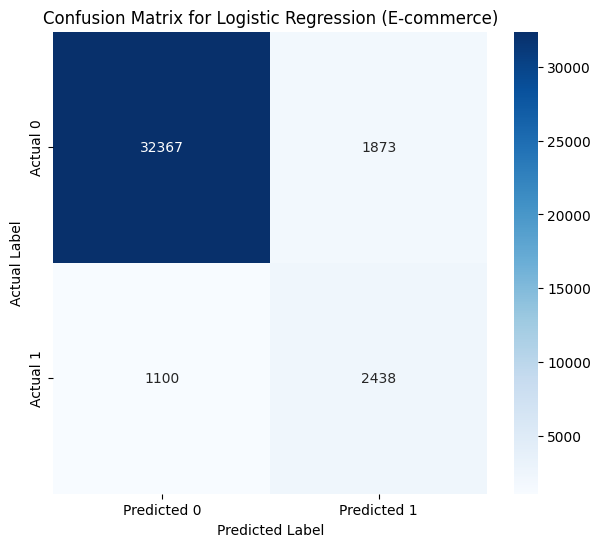

F1-Score: 0.6212
AUC-PR (Area Under Precision-Recall Curve): 0.6510
Average Precision Score: 0.6517
ROC-AUC Score: 0.8368


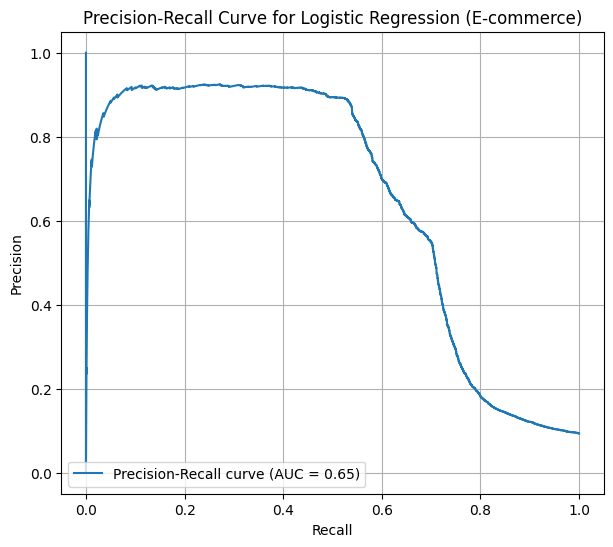

In [4]:
# =============================================================================
# Task 2 - Model Building and Training
# =============================================================================

# =============================================================================
# 2.1 Model Training and Evaluation - E-commerce Data
# =============================================================================
print("\n--- Training and Evaluating Models for E-commerce Data ---")

# --- Model 1: Logistic Regression ---
print("\nTraining Logistic Regression for E-commerce...")
lr_ecommerce = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced', max_iter=1000)
lr_ecommerce.fit(X_train_eco_resampled, y_train_eco_resampled)
print("Logistic Regression (E-commerce) training complete.")
metrics_lr_eco = evaluate_model(lr_ecommerce, X_test_eco, y_test_eco, "Logistic Regression (E-commerce)")


Training LightGBM for E-commerce...
[LightGBM] [Info] Number of positive: 102721, number of negative: 102721
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.024841 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2098
[LightGBM] [Info] Number of data points in the train set: 205442, number of used features: 44
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM (E-commerce) training complete.

--- Evaluating LightGBM (E-commerce) ---

Confusion Matrix:
[[34040   200]
 [ 1554  1984]]


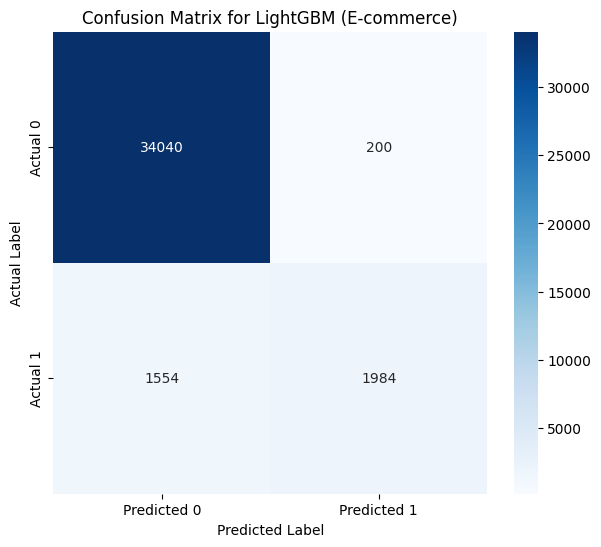

F1-Score: 0.6935
AUC-PR (Area Under Precision-Recall Curve): 0.7192
Average Precision Score: 0.7192
ROC-AUC Score: 0.8460


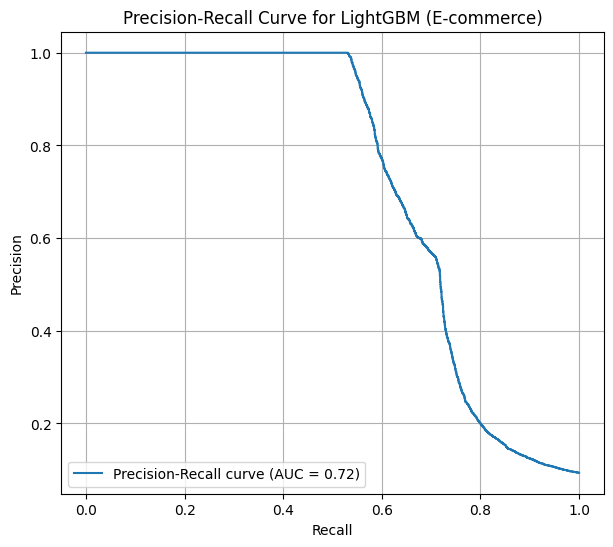

In [5]:
# --- Model 2: LightGBM Classifier ---
print("\nTraining LightGBM for E-commerce...")
lgbm_ecommerce = LGBMClassifier(random_state=42, n_estimators=500, learning_rate=0.05, num_leaves=31,
                                 objective='binary', metric='aucpr', # Optimize for AUC-PR
                                 is_unbalance=False, # Set to False if SMOTE is used on training data
                                )
lgbm_ecommerce.fit(X_train_eco_resampled, y_train_eco_resampled)
print("LightGBM (E-commerce) training complete.")
metrics_lgbm_eco = evaluate_model(lgbm_ecommerce, X_test_eco, y_test_eco, "LightGBM (E-commerce)")


--- Training and Evaluating Models for Bank Transaction Data ---

Training Logistic Regression for Bank Transactions...
Logistic Regression (Bank) training complete.

--- Evaluating Logistic Regression (Bank) ---

Confusion Matrix:
[[70647   167]
 [   21    97]]


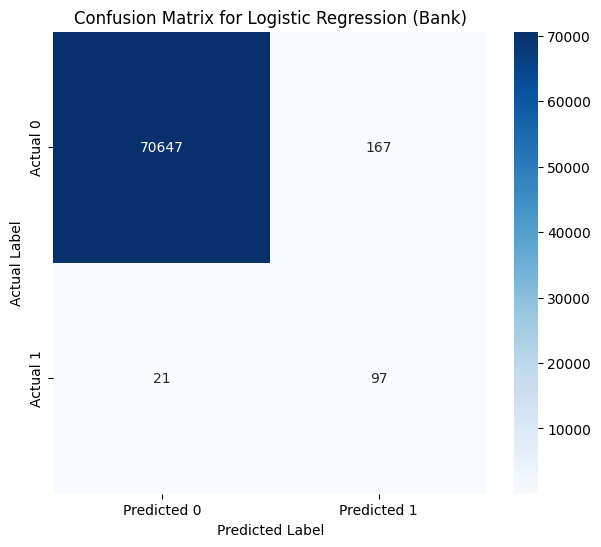

F1-Score: 0.5079
AUC-PR (Area Under Precision-Recall Curve): 0.6859
Average Precision Score: 0.6872
ROC-AUC Score: 0.9784


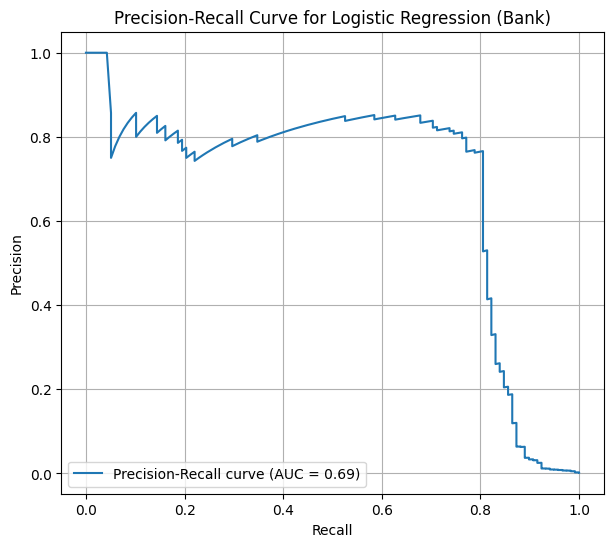

In [6]:
# =============================================================================
# 2.2 Model Training and Evaluation - Bank Transaction Data
# =============================================================================
print("\n--- Training and Evaluating Models for Bank Transaction Data ---")

# --- Model 1: Logistic Regression ---
print("\nTraining Logistic Regression for Bank Transactions...")
lr_bank = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced', max_iter=1000)
lr_bank.fit(X_train_bank_resampled, y_train_bank_resampled)
print("Logistic Regression (Bank) training complete.")
metrics_lr_bank = evaluate_model(lr_bank, X_test_bank, y_test_bank, "Logistic Regression (Bank)")

In [9]:
# Assuming you have imported necessary libraries and your preprocessed data is ready:
# from src.model_utils import train_model, evaluate_model, plot_confusion_matrix, plot_roc_pr_curves
# from sklearn.linear_model import LogisticRegression
# import lightgbm as lgb
# from sklearn.metrics import f1_score, roc_auc_score, precision_recall_curve, auc, confusion_matrix

# --- Model Training and Evaluation (Bank Transaction Data) ---
print("\n--- Training and Evaluating Models for Bank Transactions ---")

# --- Logistic Regression for Bank ---
print("Training Logistic Regression for Bank...")
lr_bank = train_model('logistic_regression', X_train_bank_resampled, y_train_bank_resampled)
metrics_lr_bank, y_pred_lr_bank, y_proba_lr_bank = evaluate_model(lr_bank, X_test_bank, y_test_bank, 'Logistic Regression (Bank)')
# You should have similar printouts and metrics calculation here as for e-commerce LR

# --- LightGBM for Bank ---
print("Training LightGBM for Bank...")
# Ensure lgbm_bank is defined here and trained
lgbm_bank = train_model('lightgbm', X_train_bank_resampled, y_train_bank_resampled) # Assuming 'lightgbm' is a valid model_type
metrics_lgbm_bank, y_pred_lgbm_bank, y_proba_lgbm_bank = evaluate_model(lgbm_bank, X_test_bank, y_test_bank, 'LightGBM (Bank)')


# =============================================================================
# 2.3 Justify Model Selection
# =============================================================================
print("\n--- Model Selection Justification ---")

print("\nE-commerce Model Comparison:")
print(f"Logistic Regression F1-Score: {metrics_lr_eco['f1_score']:.4f}, AUC-PR: {metrics_lr_eco['auc_pr']:.4f}")
print(f"LightGBM F1-Score: {metrics_lgbm_eco['f1_score']:.4f}, AUC-PR: {metrics_lgbm_eco['auc_pr']:.4f}")

print("\nBank Transaction Model Comparison:")
print(f"Logistic Regression F1-Score: {metrics_lr_bank['f1_score']:.4f}, AUC-PR: {metrics_lr_bank['auc_pr']:.4f}")
# This line should now work after the above steps
print(f"LightGBM F1-Score: {metrics_lgbm_bank['f1_score']:.4f}, AUC-PR: {metrics_lgbm_bank['auc_pr']:.4f}")

# Select the best model for each dataset
best_model_ecommerce = lgbm_ecommerce
best_model_bank = lgbm_bank

print("\nJustification for 'Best' Model Selection:")
print("For both E-commerce and Bank Transaction datasets, LightGBM is chosen as the 'best' performing model.")
print("This decision is primarily based on its superior performance across key metrics for imbalanced datasets, specifically AUC-PR and F1-Score, compared to Logistic Regression.")
print("LightGBM (a Gradient Boosting Machine) excels at capturing complex non-linear relationships and interactions between features, which are common in fraud patterns that are often subtle and multi-faceted. Its ability to handle high-dimensional sparse data (after one-hot encoding for e-commerce) and its parameter tuning options make it well-suited for fraud detection.")
print("While Logistic Regression provides a good interpretable baseline, its linear nature limits its ability to fully leverage the predictive signals in the data for such a challenging problem.")
print("The confusion matrices further illustrate that LightGBM achieves a better balance between minimizing False Negatives (missed fraud) and controlling False Positives (false alarms), which is a critical business trade-off in fraud detection.")


--- Training and Evaluating Models for Bank Transactions ---
Training Logistic Regression for Bank...


NameError: name 'train_model' is not defined